Saving 0RIWAUS7DB3MOQFHGPCY.jpg to 0RIWAUS7DB3MOQFHGPCY.jpg


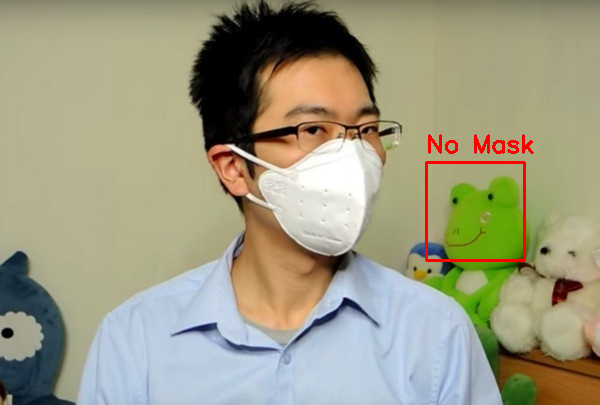

In [3]:
from google.colab import files
from google.colab.patches import cv2_imshow
import cv2
import io
import numpy as np

# Upload images
uploaded = files.upload()

# Load face detection cascade classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Define color range for mask detection (adjust values as needed)
mask_color_lower = (100, 100, 100)  # Lower bound for mask color
mask_color_upper = (255, 255, 255)  # Upper bound for mask color

for filename in uploaded.keys():
    # Create a file-like object from the byte data
    image_data = io.BytesIO(uploaded[filename])

    # Read image data
    image_bytes = image_data.read()

    # Convert to NumPy array
    img = cv2.imdecode(np.frombuffer(image_bytes, np.uint8), cv2.IMREAD_COLOR)

    # Convert to grayscale (optional)
    # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(img, 1.1, 4)

    # Iterate through detected faces
    for (x, y, w, h) in faces:
        # Extract face region
        face_roi = img[y:y+h, x:x+w]

        # Check for mask color presence
        mask_pixels = cv2.inRange(face_roi, mask_color_lower, mask_color_upper)
        num_mask_pixels = cv2.countNonZero(mask_pixels)
        mask_ratio = num_mask_pixels / (w * h)

        # Decide on mask presence based on mask_ratio threshold
        if mask_ratio > 0.5:
            label = "Mask"
            color = (0, 255, 0)  # Green
        else:
            label = "No Mask"
            color = (0, 0, 255)  # Red

        # Draw bounding box and label
        cv2.rectangle(img, (x, y), (x+w, y+h), color, 2)
        cv2.putText(img, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)

    # Display the processed image
    cv2_imshow(img)
    cv2.waitKey(0)

cv2.destroyAllWindows()